# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第09课：官方示例讲解-Quick Start

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

#### 对于着急入门igraph的初学者来说，这篇介绍将给你一个以下操作的快速概述：
#### （1）建立一个图
#### （2）设置节点和边的属性
#### （3）使用matplotlib绘制图
#### （4）将可视化的图保存下来
#### （5）以.gml文件的形式导出和导入图形

In [2]:
import igraph as ig
import matplotlib.pyplot as plt

In [3]:
# 构造一个有5个顶点的图
n_vertices = 5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
g = ig.Graph(n_vertices, edges)

In [4]:
# 设置图、节点和边的属性
g["title"] = "Small Social Network"
g.vs["name"] = ["Daniel Morillas", "Kathy Archer", "Kyle Ding", "Joshua Walton", "Jana Hoyer"]
g.vs["gender"] = ["M", "F", "F", "M", "F"]
g.es["married"] = [False, False, False, False, False, False, False, True]

# 更改已设置的节点和连边属性
g.vs[1]["name"] = "Kathy Morillas"
g.es[0]["married"] = True

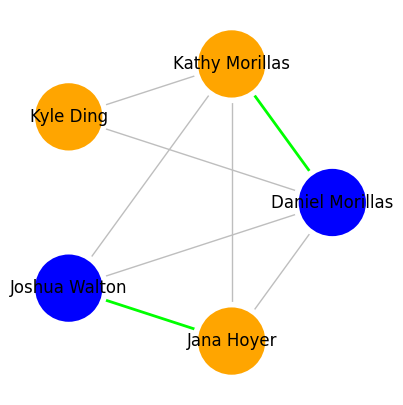

In [5]:
# 借助matplotlib绘图
# 注意属性可以全局设置(例如vertex_size)，也可以使用数组单独设置(例如vertex_color)。
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    layout="circle", # 设置布局为circular layout
    vertex_size=0.5,
    vertex_color=["blue" if gender == "M" else "orange" for gender in g.vs["gender"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=12.0,
    edge_width=[2 if married else 1 for married in g.es["married"]],
    edge_color=["lime" if married else "gray" for married in g.es["married"]]
)

plt.show()

# 将可视化的图保存为图文件
fig.savefig('./attached files/social_network.png', dpi=300)
fig.savefig('./attached files/social_network.jpg', dpi=300)
fig.savefig('./attached files/social_network.pdf')

In [6]:
# 将图作为gml文件导出和导入
g.save("./attached files/social_network.gml")
g = ig.load("./attached files/social_network.gml")

D:\python396\lib\site-packages\igraph\io\files.py:494: RuntimeWarning: The boolean edge attribute 'married' was converted to numeric. at src/io/gml.c:1281
  return writer(f, *args, **kwds)


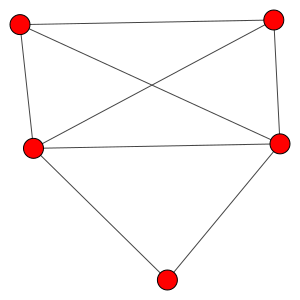

In [7]:
ig.plot(g, bbox=(300, 300))